<a href="https://colab.research.google.com/github/DarkSpace56831/AirQo/blob/main/TEAM_SOMETHING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RECOMMENDATION Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM JS6**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Movie Recommendation 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

### Problem Statement

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

### Data overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.


# Team Supervisor
- Jamie Snyders

# TEAM JS6 MEMBERS
- 1. Bongo Seakhoa (Team Representative);
- 2. Shalom Mashabane (Second in command) ;
- 3. Ulanda Wilcocks;
- 4. Pauline Kolobe;
- 5. Siphesihle Gama;
- 6. Tlotlo Mokabo



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>




<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---


# Import all the  **libraries**

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
import numpy as np


In [2]:
#Installing Comet 
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="03qOxvjKH5ey9y6sq96UhM1r5",
    project_name="js6-unsupervised-learning",
    workspace="missmash",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.com/missmash/js6-unsupervised-learning/513763d9c46044b9880f1db2b45e67b2




<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

In [4]:
# Install the Kaggle library

! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Make a directory named “.kaggle”

! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
#Copy the “kaggle.json” into this new directory

! cp kaggle.json ~/.kaggle/

In [7]:
#Allocate the required permission for this file.

! chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Downloading Competitions dataset:

! kaggle competitions download edsa-movie-recommendation-2022

edsa-movie-recommendation-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
#unzip the files 
! unzip edsa-movie-recommendation-2022

Archive:  edsa-movie-recommendation-2022.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: imdb_data.csv           
  inflating: links.csv               
  inflating: movies.csv              
  inflating: sample_submission.csv   
  inflating: tags.csv                
  inflating: test.csv                
  inflating: train.csv               


In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
imdb_data = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')

train_copy = train.copy()
test_copy = test.copy()
tags_copy = tags.copy()
movies_copy = movies.copy()
links_copy = links.copy()
imdb_data_copy = imdb_data.copy()
genome_tags_copy = genome_tags.copy()
genome_scores_copy = genome_scores.copy()

In [11]:
'''

file_list = [train, test, tags, movies, links, imdb_data, genome_tags, genome_scores]

for file in file_list:

  file.dropna(axis=0,inplace=True)'''


'\n\nfile_list = [train, test, tags, movies, links, imdb_data, genome_tags, genome_scores]\n\nfor file in file_list:\n\n  file.dropna(axis=0,inplace=True)'


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---

In [12]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [13]:
train = train.merge(movies, on='movieId', how='inner')
train

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
10000033,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,1567628158,Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,1568558126,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,1563175258,Guys & Balls (2004),Comedy|Romance


In [14]:
from datetime import datetime
objtmstmp = train.timestamp[1]
objectdate = datetime.fromtimestamp (objtmstmp)
print ("timestamp to date conversion.")
print (" date" , objectdate)
print ("type of date object =", type (objectdate))

timestamp to date conversion.
 date 2009-03-19 09:34:57
type of date object = <class 'datetime.datetime'>


In [15]:
imdb_data

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [16]:
def combine_data(imdb_data, movies):

    df = imdb_data[['movieId','title_cast','director', 'plot_keywords']]
    df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
    df.head()
    df['title_cast'] = df.title_cast.astype(str)
    df['plot_keywords'] = df.plot_keywords.astype(str)
    df['genres'] = df.genres.astype(str)
    df['director'] = df.director.astype(str)
    df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
    df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
    df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))
    df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
    df['genres'] = df['genres'].apply(lambda x: " ".join(x))

    return df.head()

df = combine_data(imdb_data, movies)

In [17]:
df
#tags
#ratings.drop('timestamp', axis=1, inplace=True)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Jonathan Hensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren]",Mark Steven Johnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[Whitney Houston, Angela Bassett, Loretta Devine]",Terry McMillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[Steve Martin, Diane Keaton, Martin Short]",Albert Hackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [18]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [19]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [20]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [21]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [22]:
ratings = train.merge(movies, on='movieId', how='inner')
ratings.drop('timestamp', axis=1, inplace=True)

In [23]:
ratings

,userId,movieId,rating,title_x,genres_x,title_y,genres_y
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...,...
10000033,84146,107912,3.0,"Fallen, The (2004)",Action|Drama|War,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,Formentera Lady,(no genres listed),Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,Nocturne (1946),Crime|Drama|Mystery,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,Guys & Balls (2004),Comedy|Romance,Guys & Balls (2004),Comedy|Romance


In [24]:
rate = pd.DataFrame(ratings.groupby(['title_x'])[['rating']].mean())
rate['rating_counts'] = pd.DataFrame(ratings.groupby(['title_x'])['rating'].count())
rate['popularity'] = pd.DataFrame(ratings.groupby(['title_x'])['rating'].count()*ratings.groupby(['title_x'])['rating'].mean())
rate.sort_values(by='popularity', ascending=False).head(15)

#Plot bar graph

,rating,rating_counts,popularity
title_x,,,
"Shawshank Redemption, The (1994)",4.417624,32831,145035.0
Pulp Fiction (1994),4.195097,31697,132972.0
Forrest Gump (1994),4.047216,32383,131061.0
"Silence of the Lambs, The (1991)",4.144172,29444,122021.0
"Matrix, The (1999)",4.154253,29014,120531.5
Star Wars: Episode IV - A New Hope (1977),4.111811,27560,113321.5
Schindler's List (1993),4.247625,24004,101960.0
Fight Club (1999),4.227906,23536,99508.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.146236,22956,95181.0


In [25]:
def feature_frequency(df, column):
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)


    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
    final = pd.DataFrame(genre_dict)
    return final
genres = feature_frequency(movies, 'genres')

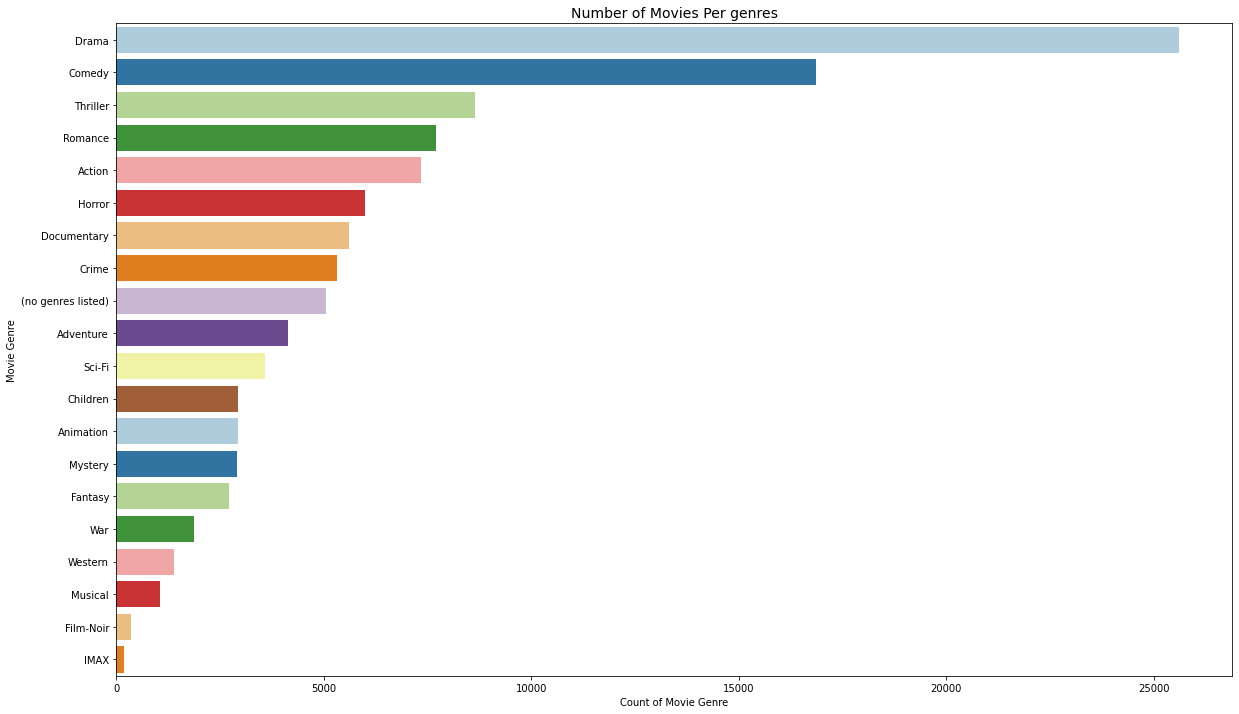

In [26]:
def feature_count(df, column):
    plt.figure(figsize=(20,12))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='Paired', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel('Movie Genre')
    plt.xlabel('Count of Movie Genre')
    plt.show()

feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

In [27]:
df = imdb_data[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


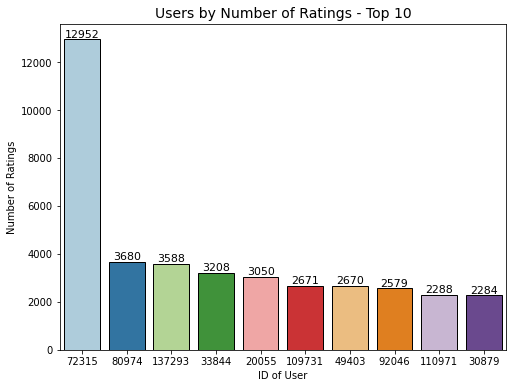

In [28]:
def user_ratings_count(df, n):
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='Paired', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title('Users by Number of Ratings - Top 10', fontsize=14)
    plt.xlabel('ID of User')
    plt.ylabel('Number of Ratings')

    plt.show()

user_ratings_count(train,10)

In [29]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[robinwilliams, jonathanhyde, kirstendunst]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[waltermatthau, jacklemmon, sophialoren]",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[whitneyhouston, angelabassett, lorettadevine]",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[stevemartin, dianekeaton, martinshort]",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [30]:
# Extract and display the 10 most popular films in the dataset 
#ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
#ratings_mean_count.head(15)

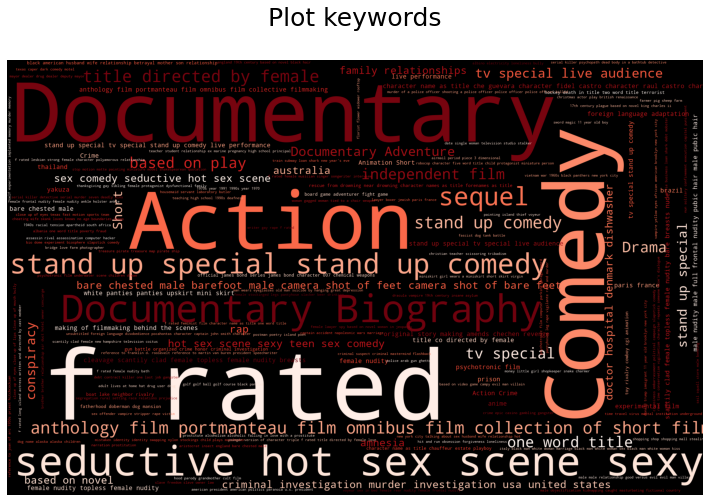

In [31]:

def wordcloud_generator(df, column):  
  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    keyword_pair.sort(key = lambda x: x[1],reverse=True)

    for s in keyword_pair:
        words[s[0]] = s[1]
        
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 

plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

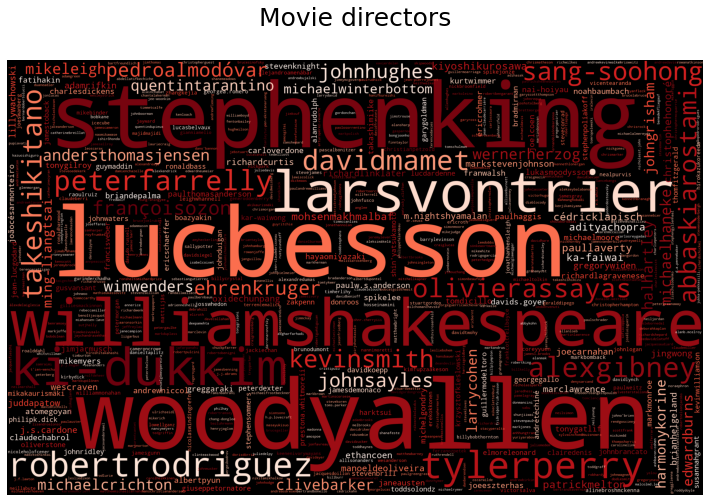

In [32]:
# Generate a WordCloud using the movie directors  
directors = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

# FILES TO USE


<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  This is where we will clean the dataset, and possibly create new features. |

Picking up from where the EDA left off we will now clean the data based on what has been Identified above 

In [33]:
#MODIFY AS REQUIRED!

train_copy
test_copy
tags_copy
movies_copy
links_copy 
imdb_data_copy 
genome_tags_copy 
genome_scores_copy

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [34]:
df = pd.merge(imdb_data_copy, movies_copy,on= 'movieId')
df = pd.merge(df, train_copy, on='movieId')
df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,userId,rating,timestamp
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


In the above dataframe we have to look at the features and make sure that each column is assigned the correct type

In [35]:
#Gnome scores 
gmome_scores_blend = pd.merge(genome_scores_copy ,genome_tags_copy , on='tagId')
gmome_scores_blend.head()

,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,2,1,0.04125,007
2,3,1,0.04675,007
3,4,1,0.03425,007
4,5,1,0.04300,007


The dataframes above are too big to be put into one dataframe and thus we will have to choose the features that we use from them wisely and also try to extract as much possible information from them whilst not overburdening the computing recources we have at hand

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   movieId        int64  
 1   title_cast     object 
 2   director       object 
 3   runtime        float64
 4   budget         object 
 5   plot_keywords  object 
 6   title          object 
 7   genres         object 
 8   userId         int64  
 9   rating         float64
 10  timestamp      int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 881.9+ MB


From the above we can see that timestamp is an integer value I world like to see this as a date to see if user preferences change over time there are a lot of columns where the keywords need to be split also this will cause there to be a lot of features particularly for the cast column but this split does have value as some people do watch the particular movie because of a particular individual is casted.

In [37]:
#Timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp'].head()

0   1970-01-12 12:18:36.786
1   1970-01-11 21:51:23.155
2   1970-01-10 15:25:04.576
3   1970-01-17 16:37:36.969
4   1970-01-10 20:01:07.827
Name: timestamp, dtype: datetime64[ns]

We can see from the above that the timestamps reflect a time from the 1970's and thus these values are nonsensical for our purposes because the movie that they are reflecting on was releaced in 1995 (toy story) it is thus best to drop the timestamp column as it is of no use to us.

In [38]:
#Dropping Timestamp
df.drop(columns=['timestamp'], inplace=True)

We will now split up the columns and one hot encode them to represent the titlecast plot keywords and geanres as features that are then either represented by a 0 or 1 depending on if that individual or feature is present in the film

In [ ]:
#Split the cast 
df['title_cast'] = df['title_cast'].str.split('|')

In [ ]:
#Split the plot keywords
df['plot_keywords'] = df['plot_keywords'].str.split('|')

In [ ]:
#Split the genres
df['genres'] = df['genres'].str.split('|')

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will create one or more models that are able to accurately make predictions . |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| This is where we will compare the relative performance of the various trained models on a holdout dataset and comment on what model is the best and why. |

---


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we will discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---